# Data

Data was automatically collected by the ride-sharing company Didi and consisted of information about each route their drivers took over the month of November 2016. 

## Items

Didi also kept a record of each order that was placed for a driver in the month of November. The route data recorded (of each driver every 3 seconds or so):

1. Anonymised Driver ID 

2. Order ID 

3. Unix timestamp, 

4. latitude and longitude


The information about the orders included the Ride start and stop times; Pick-up Latitude and Longitude; and Drop-off
Latitude and Longitude for each order. 

## Procedure

It should be noted that Driver IDs were re-anonymised each day, making it impossible to track an individual driver over multiple days.

1. In order to make this data more useable, the route data was summarised to one line for each trip that conveyed the distance travelled, the start time, and the time taken. 

2. This summarised data was then compared and merged with the Order data so that a complete set of data could be analysed. 

3. Two consecutive days were then merged together in order to give a 4am to 4am day rather than the traditional 12am to 12am. This is to capture trips that crossover midnight.


The data was then cleaned by removing drivers who showed unrealistic data trends such as having a second trip that began prior to the conclusion of the first trip or having trips that were seen as outliers in terms of the distance,
speed or time travelled. The outliers were defined as data that is not within the middle 99% of the data set for each of the variables.


## Shift data

The data was then further condensed into one row per driver shift, with a shift defined as 2 hour or greater gap between orders. This shift data included the shift 

1. start time, 

2. end time, 

3. order number, 

4. occupied time 

5. occupied distance. 

This data was also then summarised into one row per driver, with each row describing the total number 30 of shifts, average number of orders, average gap between orders, average shift duration, average occupied time, first shift start time and average occupied distance. 

The drivers were then clustered using both a k-means and a hierarchical clustering algorithm in order to discover the traits that link them together.

In [28]:
import pandas as pd

import numpy as np

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score 

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

import time

In [29]:
def Get_hour(timestamp):

    time_local = time.localtime(timestamp)
    
    dt = time.strftime("%Y-%m-%d %H:%M:%S",time_local)
    
    return int(dt[11:13])

In [139]:
GetStr=lambda x:str(x) if x>=10 else '0'+str(x)

date_list=list(range(1,15,1))

Df=pd.DataFrame(list(),columns=['Day','Driver ID', 'Total Number of Shifts', 'Average Order Number',
           'Average Shift Duration (sec)', 'Average Occupied Time (sec)',
           'First Shift Start Time', 'Average Occupied Distance(m)',
           'Gap Between Shifts'])


for dt in date_list:
    
    print('*'*50)
    
    print("date: ", dt)

    df = pd.read_excel('./Data/Source/indexNov'+GetStr(dt)+'.xlsx')
    
    df['Day']='2016-11-'+GetStr(dt)

    df=df[['Day','Driver ID', 'Total Number of Shifts', 'Average Order Number',
           'Average Shift Duration (sec)', 'Average Occupied Time (sec)',
           'First Shift Start Time', 'Average Occupied Distance(m)',
           'Gap Between Shifts']]
    
    Df=pd.concat([Df,df],ignore_index=True)
    
Df

**************************************************
date:  1
**************************************************
date:  2
**************************************************
date:  3
**************************************************
date:  4
**************************************************
date:  5
**************************************************
date:  6
**************************************************
date:  7
**************************************************
date:  8
**************************************************
date:  9
**************************************************
date:  10
**************************************************
date:  11
**************************************************
date:  12
**************************************************
date:  13
**************************************************
date:  14


,Day,Driver ID,Total Number of Shifts,Average Order Number,Average Shift Duration (sec),Average Occupied Time (sec),First Shift Start Time,Average Occupied Distance(m),Gap Between Shifts
0,2016-11-01,00020e3d875210ba7b86de9a17a969d9,1,4.000000,8831.000000,4370.000000,1478018899,31009.334648,0.000000
1,2016-11-01,0002a9da2932f75a1d5f12fc99ea9945,1,4.000000,7915.000000,4173.000000,1478018005,21008.065241,0.000000
2,2016-11-01,000770ada4aa5d856b5a766fb6bf7cf1,1,5.000000,11649.000000,5274.000000,1477962292,33542.772296,0.000000
3,2016-11-01,0007a380800445346fff19afc4071ce3,1,1.000000,1419.000000,1419.000000,1477963840,7092.253954,0.000000
4,2016-11-01,0008c9d2ac91c00ef8b3ef80eba02a06,3,2.666667,6323.333333,2855.333333,1477967006,5456.392987,4.233194
5,2016-11-01,00095da02ea38d4d8eaa120201e38ae9,1,1.000000,1522.000000,1522.000000,1477965144,6042.604979,0.000000
6,2016-11-01,000d0e4bd461b1f964daeb6d21868757,2,1.500000,2745.000000,2363.500000,1477944001,6722.128436,15.981389
7,2016-11-01,000db06fb2f4a700c4105348643f593e,1,1.000000,1161.000000,1161.000000,1477968693,4486.973486,0.000000
8,2016-11-01,000f63bea1c5b36b439d6fa60ee6cac7,2,5.500000,8693.000000,5495.000000,1477967652,19924.727140,4.576667
9,2016-11-01,00116085b3abd9a855050bf411695811,1,3.000000,5981.000000,4021.000000,1477999323,34737.769214,0.000000


In [155]:
Temp=Df.groupby('Driver ID').count()

Temp

,Day,Total Number of Shifts,Average Order Number,Average Shift Duration (sec),Average Occupied Time (sec),First Shift Start Time,Average Occupied Distance(m),Gap Between Shifts
Driver ID,,,,,,,,
0000a3c4817080300cf3ef7d58faaad1,1,1,1,1,1,1,1,1
0001213d9f0ff0a68bcf8fbd0ca4bda8,1,1,1,1,1,1,1,1
00020e3d875210ba7b86de9a17a969d9,1,1,1,1,1,1,1,1
000279f20291f5c67614f0c5c1e70097,1,1,1,1,1,1,1,1
0002a9da2932f75a1d5f12fc99ea9945,2,2,2,2,2,2,2,2
0002fc6c5d5164e247682bf553751bb5,1,1,1,1,1,1,1,1
0003476303404ad82dc782d4fa8d008f,1,1,1,1,1,1,1,1
00038b8659f7b4605f95655090c13a77,1,1,1,1,1,1,1,1
0003b16454cb8dd93ef72917907c33f9,1,1,1,1,1,1,1,1


**************************************************
The number of clusters:  2
**************************************************
The number of clusters:  3
**************************************************
The number of clusters:  4
**************************************************
The number of clusters:  5
**************************************************
The number of clusters:  6
**************************************************
The number of clusters:  7
**************************************************
The number of clusters:  8
**************************************************
The number of clusters:  9
**************************************************
The number of clusters:  10
**************************************************
The number of clusters:  11
**************************************************
The number of clusters:  12
**************************************************
The number of clusters:  13
**************************************************
The numbe

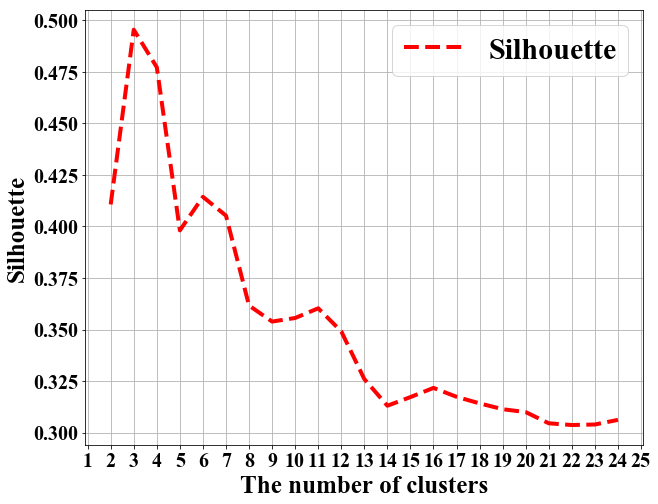

In [153]:
X=np.array(df[['Total Number of Shifts', 'Average Order Number',
       'Average Shift Duration (sec)', 'Average Occupied Time (sec)',
       'First Shift Start Time', 'Average Occupied Distance(m)']])
    

SSE={}

Silhouette={}

k_list=list(range(2,25,1))

for k in k_list:
    print('*'*50)
    print('The number of clusters: ',k)
    clf = KMeans(n_clusters=k)
    clf.fit(X)
    SSE[k]=clf.inertia_
    Silhouette[k]=silhouette_score(X,clf.labels_,metric='euclidean')
    
'''Silhouette score'''

figsize = 10,8

figure,ax1 = plt.subplots(figsize=figsize)

plt.tick_params(labelsize=20)

labels = ax1.get_xticklabels() + ax1.get_yticklabels()

[label.set_fontname('Times New Roman') for label in labels]

font = {'weight' : 'normal',\
        'family' : 'Times New Roman',\
        'size': 25}

font_legend = {'weight' : 'normal',\
        'family' : 'Times New Roman',\
        'size': 30}

ax1.plot(list(Silhouette.keys()),list(Silhouette.values()),'r--',linewidth=4,label='Silhouette')


plt.grid()

ax1.set_xlabel('The number of clusters',font)

ax1.set_ylabel('Silhouette',font)

ax1.legend(loc="upper right",prop=font_legend)

xmajorLocator   = MultipleLocator(1)

ax1.xaxis.set_major_locator(xmajorLocator) 


plt.show()


# Ride-hailing Supply Clustering

## K-means

1. In order to undertake k-means clustering, it was first necessary to determine the number of clusters that our drivers should be divided into. 

Initially it was hypothesised that we might observe two main clusters of drivers, those who drive until they reach a certain target income, and those who choose to drive at the 40 times where they earn the most money. 


Ultimately, however, it was decided that the best way to determine the number of clusters from the data was to calculate the silhouette value for each k value, ranging from 2 to 25. 

Plotting this for multiple days would ideally reveal a consensus that the data is best separated into a certain number of clusters.

In [89]:
df = pd.read_excel('./Data/Source/indexNov'+GetStr(dt)+'.xlsx')

df=df[['Driver ID', 'Total Number of Shifts', 'Average Order Number',
       'Average Shift Duration (sec)', 'Average Occupied Time (sec)',
       'First Shift Start Time', 'Average Occupied Distance(m)',
       'Gap Between Shifts']]



X=np.array(df[['Total Number of Shifts', 'Average Order Number',
       'Average Shift Duration (sec)', 'Average Occupied Time (sec)',
       'First Shift Start Time', 'Average Occupied Distance(m)']])

clf = KMeans(n_clusters=3)

clf.fit(X)

df['label']=clf.labels_

Labels=["A","B","C"]

Get_label=lambda x:Labels[x]

df['label']=df.apply(lambda x:Get_label(x['label']),axis=1)

df

,Driver ID,Total Number of Shifts,Average Order Number,Average Shift Duration (sec),Average Occupied Time (sec),First Shift Start Time,Average Occupied Distance(m),Gap Between Shifts,label
0,000279f20291f5c67614f0c5c1e70097,3,1.333333,1515.666667,1360.666667,1479098341,2997.975056,3.092361,B
1,0006853f949299b561d8e8708efa91fd,2,4.000000,6416.500000,3415.500000,1479090131,12130.232742,8.661944,B
2,000895c69ec296d66a2904bd529958f7,1,5.000000,12459.000000,6607.000000,1479107499,33840.498781,0.000000,A
3,000bd96d0f3cd9459c9685e226bdebce,1,2.000000,1592.000000,1113.000000,1479140515,7321.218468,0.000000,A
4,001116067841afd3a4f929f87b7741c0,2,9.000000,19493.000000,8667.000000,1479079168,58958.285188,3.432500,C
5,00129c67c8729cd929eb695b9b35bf45,1,4.000000,10502.000000,3698.000000,1479124752,34205.192938,0.000000,A
6,0012b5b90e367e18774e535aa380e46a,1,1.000000,4247.000000,4247.000000,1479087019,18493.893269,0.000000,B
7,0013f820326052bda59456deef050c92,1,3.000000,3635.000000,2008.000000,1479139679,22604.493249,0.000000,A
8,00163a0593fe6b843a44a79e9a633779,3,3.666667,8236.000000,4579.000000,1479084266,17229.981216,3.851528,B
9,00165ed0ed5279b9fdf6bc86831d03f7,2,1.500000,3432.500000,2997.500000,1479080843,6822.379317,9.036111,B


# Result analysis

In [128]:
Stat=df.groupby('label').count()

Stat=Stat[['Driver ID']]

Stat=Stat.rename(columns={"Driver ID": "Quantity"})

Total=Stat['Quantity'].sum()

Get_divide=lambda x,y:round(x/y,2)

Stat['Percentage']=Stat.apply(lambda x:Get_divide(x['Quantity'],Total),axis=1)

Stat



,Quantity,Percentage
label,,
A,11419,0.36
B,16484,0.52
C,3673,0.12


In [125]:
Stat=df.groupby('label').mean()

Get_3600=lambda x:round(x/3600.0,2)

Get_10=lambda x:round(x/10.0,2)

Stat['First Shift Start Time']=Stat.apply(lambda x:Get_hour(int(x['First Shift Start Time'])),axis=1)

Stat['First Shift Start Time (x10 hours)']=Stat.apply(lambda x:Get_10(x['First Shift Start Time']),axis=1)

Stat['Average Shift Duration (hour)']=Stat.apply(lambda x:Get_3600(x['Average Shift Duration (sec)']),axis=1)

Stat['Average Occupied Time (hour)']=Stat.apply(lambda x:Get_3600(x['Average Occupied Time (sec)']),axis=1)

Stat=Stat[['Total Number of Shifts', 'Average Order Number','Average Shift Duration (hour)',\
           'Average Occupied Time (hour)','First Shift Start Time (x10 hours)', 'Average Occupied Distance(m)']]

Stat['label']=Stat.index

Stat

,Total Number of Shifts,Average Order Number,Average Shift Duration (hour),Average Occupied Time (hour),First Shift Start Time (x10 hours),Average Occupied Distance(m),label
label,,,,,,,
A,1.088712,2.114736,1.01,0.70,2.0,18398.516541,A
B,1.671378,2.703635,1.48,0.95,0.9,15499.486125,B
C,1.035666,7.704329,5.10,2.70,1.2,70428.250111,C


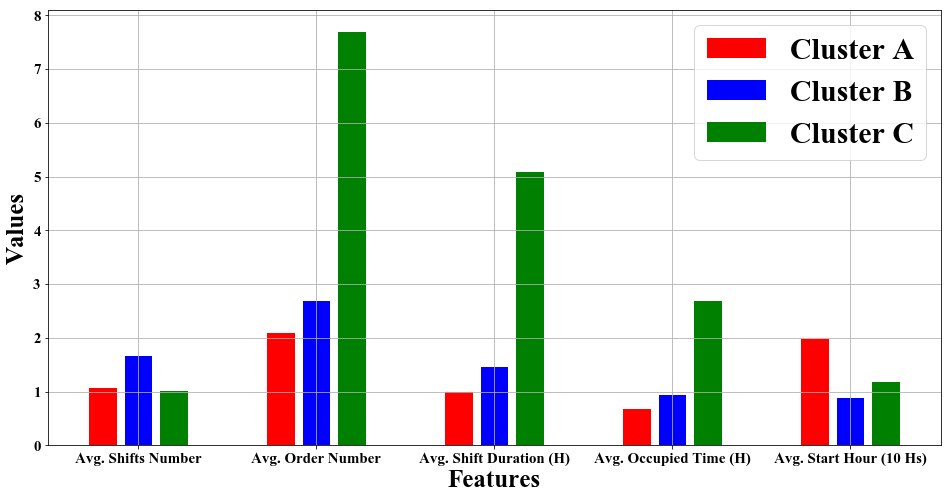

In [119]:
figsize = 16,8
figure,ax1 = plt.subplots(figsize=figsize)
font_label = {'family' : 'Times New Roman','weight' : 'normal','size': 15}
font_title = {'family' : 'Times New Roman','weight' : 'normal','size': 30}
plt.tick_params(labelsize=15)
labels = ax1.get_xticklabels() + ax1.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
font = {'family' : 'Times New Roman','weight' : 'normal','size': 25}
interval=[i for j in range(5) for i in range(10)]

coulmns=list(Stat[['Total Number of Shifts', 'Average Order Number','Average Shift Duration (hour)',\
           'Average Occupied Time (hour)','First Shift Start Time (x10 hours)']].columns)

Colors=['r','b','g']

Features=['Avg. Shifts Number','Avg. Order Number','Avg. Shift Duration (H)','Avg. Occupied Time (H)','Avg. Start Hour (10 Hs)']

for i in range(len(coulmns)):
    
    for j in range(len(Labels)):
        
        if i == len(coulmns)-1:
            
            ax1.bar(j+1+(i*5), Stat[coulmns[i]].iloc[j], label='Cluster '+Labels[j],fc = Colors[j],width = 0.8, edgecolor='white')
            
        else:
            
            ax1.bar(j+1+(i*5), Stat[coulmns[i]].iloc[j], fc = Colors[j],width = 0.8, edgecolor='white')
            
            
    
    
ax1.set_xticks(np.linspace(2,22,5))
ax1.set_xticklabels(Features)

ax1.legend(loc="upper right",prop=font_legend,numpoints=3)

ax1.set_xlabel('Features',font)
ax1.set_ylabel('Values',font)

plt.grid()
plt.show()


# Transition

In [136]:
df1 = pd.read_excel('./Data/Source/indexNov'+GetStr(1)+'.xlsx')

df1['date']='2016-11-01'

# df1=df1[['Driver ID', 'label1']]

df2 = pd.read_excel('./Data/Source/indexNov'+GetStr(2)+'.xlsx')

# df2['label2']=2

# df2=df2[['Driver ID', 'label2']]

# df1.merge(df2, left_on='Driver ID', right_on='Driver ID')

In [137]:
driver_id='0002a9da2932f75a1d5f12fc99ea9945'

df1.loc[df1['Driver ID']==driver_id]

,Index,Driver ID,Total Number of Shifts,Average Order Number,Average Shift Duration (sec),Average Occupied Time (sec),First Shift Start Time,Average Occupied Distance(m),Gap Between Shifts,Old Cluster Letter
1,1,0002a9da2932f75a1d5f12fc99ea9945,1,4.0,7915.0,4173.0,1478018005,21008.065241,0.0,A


In [138]:
df2.loc[df2['Driver ID']==driver_id]

,Index,Driver ID,Total Number of Shifts,Average Order Number,Average Shift Duration (sec),Average Occupied Time (sec),First Shift Start Time,Average Occupied Distance(m),Gap Between Shifts,Old Cluster Letter
0,3,0002a9da2932f75a1d5f12fc99ea9945,1,11.0,21547.0,9129.0,1478031142,67488.762288,0.0,C
